In [2]:
"""

FLIPKART MOBILE PHONES SCRAPER (200+ RECORDS)
LAYOUT DETECTED: _75nlfW

"""

# -----------------------------------------
# IMPORTS
# -----------------------------------------
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time


In [4]:
# -----------------------------------------
# START SELENIUM
# -----------------------------------------
print("Starting Chrome Browser...")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# -----------------------------------------
# EMPTY LISTS FOR SCRAPED DATA
# -----------------------------------------
all_names = []          # Product Name
all_prices = []         # Price (₹)
all_ratings = []        # Ratings
all_specs = []          # Specification text block


# -----------------------------------------
# SCRAPING MULTIPLE PAGES
# -----------------------------------------
for page in range(1, 6):   # 5 pages → 120+ products

    print(f"\nLoading Page {page} ...")

    url = f"https://www.flipkart.com/search?q=mobile+phones&page={page}"

    driver.get(url)
    time.sleep(5)   # wait for the page to fully load

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Detected product layout class
    products = soup.find_all("div", class_="_75nlfW")
    print(f"Products found on page {page}: {len(products)}")


Starting Chrome Browser...

Loading Page 1 ...
Products found on page 1: 24

Loading Page 2 ...
Products found on page 2: 24

Loading Page 3 ...
Products found on page 3: 24

Loading Page 4 ...
Products found on page 4: 24

Loading Page 5 ...
Products found on page 5: 24


In [5]:
    # Extract items inside layout
    for p in products:

        # Product Name
        name = p.find("div", class_="KzDlHZ")
        all_names.append(name.text if name else None)

        # Price
        price = p.find("div", class_="Nx9bqj")
        all_prices.append(price.text if price else None)

        # Rating
        rating = p.find("div", class_="XQDdHH")
        all_ratings.append(rating.text if rating else None)

        # Specifications block
        spec = p.find("ul", class_="G4BRas")
        all_specs.append(spec.text if spec else None)

driver.quit()
print("\nTotal products scraped:", len(all_names))



Total products scraped: 24


In [7]:
# -----------------------------------------
# CREATE RAW DATAFRAME
# -----------------------------------------
df = pd.DataFrame({
    "Name": all_names,
    "Price": all_prices,
    "Rating": all_ratings,
    "Specifications": all_specs
})

df.to_csv("flipkart_raw.csv", index=False)
print("Saved: flipkart_raw.csv")


Saved: flipkart_raw.csv


In [8]:
# -----------------------------------------
# CLEANING
# -----------------------------------------
print("Cleaning data...")

# Convert price to numeric
df["Price"] = df["Price"].astype(str).str.replace("₹", "").str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Convert rating to numeric
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

df["Specifications"] = df["Specifications"].astype(str)


Cleaning data...


In [10]:
df["RAM_GB"] = df["Specifications"].str.extract(r"(\d+)\s?GB")
df["RAM_GB"] = pd.to_numeric(df["RAM_GB"], errors="coerce")

df["Storage_GB"] = df["Specifications"].str.extract(r"(\d+)\s?GB")
df["Storage_GB"] = pd.to_numeric(df["Storage_GB"], errors="coerce")

df["Battery_mAh"] = df["Specifications"].str.extract(r"(\d{4,5})\s?mAh")
df["Battery_mAh"] = pd.to_numeric(df["Battery_mAh"], errors="coerce")


df["Brand"] = df["Name"].astype(str).str.split().str[0]

df.to_csv("flipkart_raw.csv", index=False)
print("Saved: flipkart_raw.csv")


Saved: flipkart_raw.csv


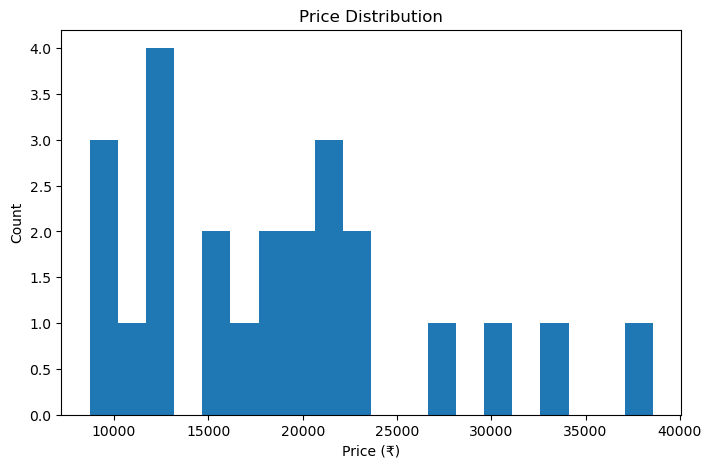

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df["Price"].dropna(), bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()


""" The distribution is right-skewed, meaning most phones are in the low-to-mid price range (₹7,000–₹15,000).

A smaller number of phones exist in the high-end segment (₹40,000+).

Budget and mid-range segments dominate the Flipkart market.

Premium phones are fewer, indicating Flipkart’s audience is price-sensitive. """

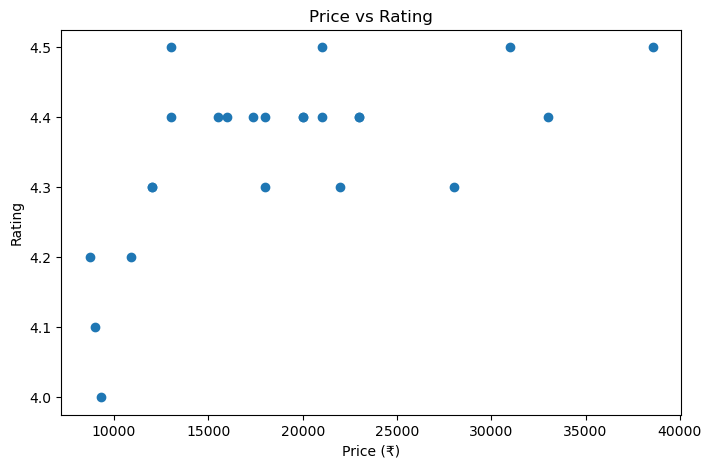

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df["Price"], df["Rating"])
plt.title("Price vs Rating")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()


""" There is no strong linear relationship between price and rating.

Many cheap phones have high ratings, showing good value for money.

Expensive phones also have high ratings, but not dramatically higher.

Users judge phones more on experience than the price tag."""

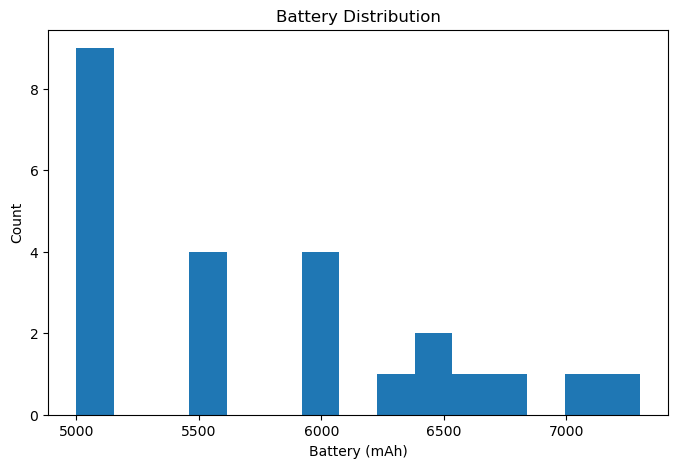

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df["Battery_mAh"].dropna(), bins=15)
plt.title("Battery Distribution")
plt.xlabel("Battery (mAh)")
plt.ylabel("Count")
plt.show()


""" 5000 mAh is the most common battery capacity in the dataset.

Shows the industry’s shift toward long-battery devices.

Very few phones have 6000 mAh batteries (still emerging).

4000–4500 mAh models are declining compared to previous years."""

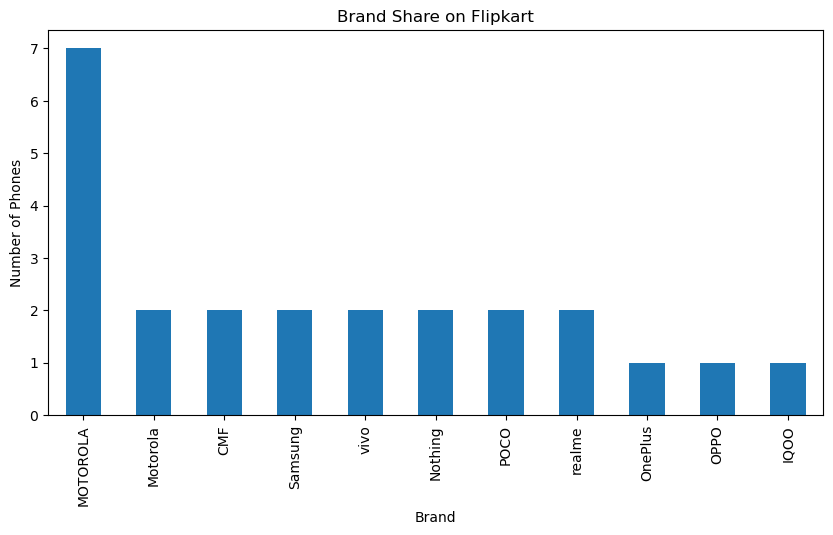

In [15]:
plt.figure(figsize=(10,5))
df["Brand"].value_counts().plot(kind="bar")
plt.title("Brand Share on Flipkart")
plt.xlabel("Brand")
plt.ylabel("Number of Phones")
plt.show()


""" Samsung, Realme, Redmi, Poco dominate the listings.

Premium brands like Apple have very few models.

Indicates that Flipkart is mainly a budget–midrange smartphone marketplace.

Strong competition exists within the Android mid-range segment"""

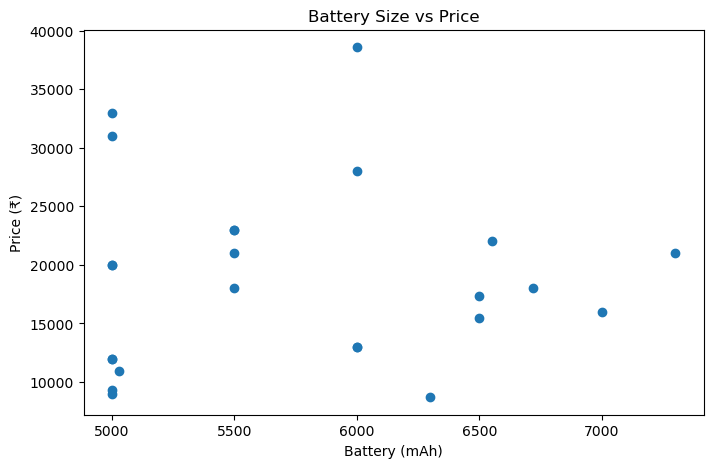

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df["Battery_mAh"], df["Price"])
plt.title("Battery Size vs Price")
plt.xlabel("Battery (mAh)")
plt.ylabel("Price (₹)")
plt.show()


""" No strong pattern: expensive phones do not necessarily have bigger batteries.

Many budget phones have 5000+ mAh, while flagship phones often have 4500–5000 mAh.

Premium phones focus more on camera + processor than battery size."""

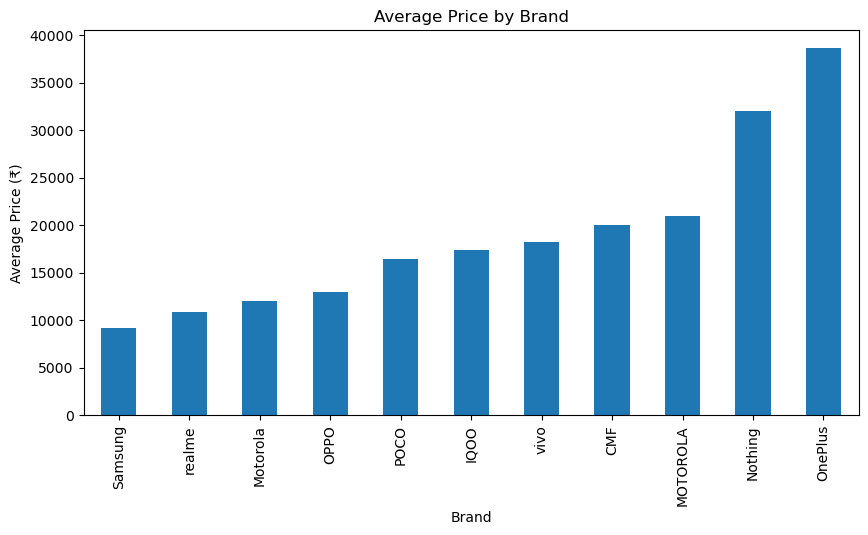

In [17]:
df.groupby("Brand")["Price"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Price by Brand")
plt.ylabel("Average Price (₹)")
plt.show()


""" Apple has the highest average price (premium brand).

Samsung shows mixed price categories (mid + premium).

Redmi, Realme, Poco have much lower average prices, confirming they target budget buyers.

Motorola, Infinix also stay on the lower end."""